In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [2]:
# importing dataset
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# droping trash columns
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 31)

In [9]:
# merging similar columns and creating other columns
df['radius'] = (df['radius_mean'] + df['radius_se'] + df['radius_worst']) / 3

df['texture'] = (df['texture_mean'] + df['texture_se'] + df['texture_worst']) / 3

df['perimeter'] = (df['perimeter_mean'] + df['perimeter_se'] + df['perimeter_worst']) / 3

df['area'] = (df['area_mean'] + df['area_se'] + df['area_worst']) / 3

df['smoothness'] = (df['smoothness_mean'] + df['smoothness_se'] + df['smoothness_worst']) / 3

df['compactness'] = (df['compactness_mean'] + df['compactness_se'] + df['compactness_worst']) / 3

df['concavity'] = (df['concavity_mean'] + df['concavity_se'] + df['concavity_worst']) / 3

df['concave points'] = (df['concave points_mean'] + df['concave points_se'] + df['concave points_worst']) / 3

df['symmetry'] = (df['symmetry_mean'] + df['symmetry_se'] + df['symmetry_worst']) / 3

df['fractal_dimension'] = (df['fractal_dimension_mean'] + df['fractal_dimension_se'] + df['fractal_dimension_worst']) / 3

In [10]:
# droping extra columns of dataframe

df.drop(columns=['radius_mean', 'radius_se', 'radius_worst',
'texture_mean', 'texture_se', 'texture_worst',
'perimeter_mean','perimeter_se',  'perimeter_worst',
'area_mean','area_se', 'area_worst',
'smoothness_mean','smoothness_se','smoothness_worst',
'compactness_mean','compactness_se', 'compactness_worst',
'concavity_mean', 'concavity_se', 'concavity_worst', 
'concave points_mean','concave points_se', 'concave points_worst',
'symmetry_mean', 'symmetry_se','symmetry_worst', 
'fractal_dimension_mean','fractal_dimension_se', 'fractal_dimension_worst',
], inplace=True)

In [11]:
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [12]:
# assigning values X and y values of the dataframe
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(455, 10)

In [15]:
X_test.shape

(114, 10)

In [16]:
# creating column transformer to handle missing values and scaling

numerical_columns = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 
                     'concavity', 'concave points', 'symmetry', 'fractal_dimension']



preprocessing = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), numerical_columns),
        ('scaling', StandardScaler(), numerical_columns)
    ]
)

#### creating pipelines for every models without hyper parameter

In [17]:
# for logistic regression
pipe1 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', LogisticRegression())
    ]
)


In [18]:
# for decision tree classifier
pipe2 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', DecisionTreeClassifier())
         ]
)

In [19]:
# for random forest classifier
pipe3 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', RandomForestClassifier())
         ]
)

In [20]:
# for gradient boosting classifier
pipe4 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', GradientBoostingClassifier())
         ]
)

In [21]:
# for svc
pipe5 = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('training', SVC())
    ]
)

In [22]:
# creating voting classifier containing all pipeline at one place and finding best accuracy using all algorithm
vc = VotingClassifier(
    estimators=[
    ('pipe1', pipe1),
    ('pipe2', pipe2),
    ('pipe3', pipe3),
    ('pipe4', pipe4),
    ('pipe5', pipe5),
    ]
)

In [23]:
# fitting model
vc.fit(X_train, y_train)

C:\Users\write\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('pipe1',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(transformers=[('imputer',
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactnes...
                                               ColumnTransformer(transformers=[('imputer',
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                               

In [24]:
# parameters for searching best hyper parameters combinations among them
params = {
    'pipe1__training__C': [0.01, 0.1, 1, 10],
    'pipe1__training__max_iter': [100, 200, 300],

    'pipe2__training__max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'pipe2__training__min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'pipe2__training__max_leaf_nodes': [None, 10, 20, 30],  # Maximum number of leaf nodes

    'pipe3__training__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'pipe3__training__max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'pipe3__training__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'pipe3__training__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'pipe3__training__max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split

    'pipe4__training__n_estimators': [100, 200, 300],  # Number of boosting stages to be run (more = better performance, but slower)
    'pipe4__training__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage, lowers the contribution of each tree
    'pipe4__training__max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'pipe4__training__max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split

    'pipe5__training__C': [0.1, 1, 10, 100],  # Regularization parameter; smaller values specify stronger regularization
    'pipe5__training__class_weight': [None, 'balanced'],  # Weights associated with classes
    'pipe5__training__probability': [True, False],  # Whether to enable probability estimates



}

In [25]:
vc.fit(X_train, y_train)

C:\Users\write\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('pipe1',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(transformers=[('imputer',
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactnes...
                                               ColumnTransformer(transformers=[('imputer',
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                               

In [26]:
# appylting random search for best parameter
random_search = RandomizedSearchCV(vc, param_distributions=params, cv=5, n_iter=2, n_jobs=-1, random_state=42, verbose=2)

In [27]:
# fitting random search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\write\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('pipe1',
                                                           Pipeline(steps=[('preprocessing',
                                                                            ColumnTransformer(transformers=[('imputer',
                                                                                                             SimpleImputer(),
                                                                                                             ['radius',
                                                                                                              'texture',
                                                                                                              'perimeter',
                                                                                                              'area',
                                                                                                              'smoothness',
                                                                                                              'compactness',
                                                                                                              'concavity',
                                                                                                              'concave '
                                                                                                              'points',
                                                                                                              'symmetry',
                                                                                                              'fractal_dimension']),
                                                                                                            ('scaling',
                                                                                                             StandardScaler(),
                                                                                                             ['radius',
                                                                                                              'texture',
                                                                                                              'perimete...
                                                                          200],
                                        'pipe4__training__learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                        'pipe4__training__max_depth': [3, 4, 5],
                                        'pipe4__training__max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                        'pipe4__training__n_estimators': [100,
                                                                          200,
                                                                          300],
                                        'pipe5__training__C': [0.1, 1, 10, 100],
                                        'pipe5__training__class_weight': [None,
                                                                          'balanced'],
                                        'pipe5__training__probability': [True,
                                                                         False]},
                   random_state=42, verbose=2)

In [28]:
# best parameters for all the algorithm
random_search.best_params_

{'pipe5__training__probability': True,
 'pipe5__training__class_weight': None,
 'pipe5__training__C': 100,
 'pipe4__training__n_estimators': 300,
 'pipe4__training__max_features': 'sqrt',
 'pipe4__training__max_depth': 5,
 'pipe4__training__learning_rate': 0.2,
 'pipe3__training__n_estimators': 100,
 'pipe3__training__min_samples_split': 10,
 'pipe3__training__min_samples_leaf': 4,
 'pipe3__training__max_features': 'sqrt',
 'pipe3__training__max_depth': 30,
 'pipe2__training__min_samples_split': 5,
 'pipe2__training__max_leaf_nodes': 10,
 'pipe2__training__max_depth': 30,
 'pipe1__training__max_iter': 100,
 'pipe1__training__C': 10}

#### assigning the hyperparameter, given by randomized search CV

In [29]:
pipe1 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', LogisticRegression(
            C=10,
            max_iter=100
        ))
    ]
)


In [30]:
pipe2 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', DecisionTreeClassifier(
            max_depth=30,
            max_leaf_nodes=10,
            min_samples_split=5
        ))
         ]
)

In [31]:
pipe3 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', RandomForestClassifier(
            max_depth=30,
            max_features='sqrt',
            min_samples_leaf=4,
            min_samples_split=10,
            n_estimators=100
        ))
         ]
)

In [32]:
pipe4 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('training', GradientBoostingClassifier(
            learning_rate=0.2,
            max_depth=5,
            max_features='sqrt',
            n_estimators=300,
        ))
         ]
)

In [33]:
pipe5 = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('training', SVC(
            probability=True,
            class_weight=None,
            C=100,
        ))
    ]
)

In [34]:
# again creating voting classifier
vc = VotingClassifier(
    estimators=[
    ('pipe1', pipe1),
    ('pipe2', pipe2),
    ('pipe3', pipe3),
    ('pipe4', pipe4),
    ('pipe5', pipe5),
    ]
)

In [35]:
# fitting new voting classifier
vc.fit(X_train, y_train)

C:\Users\write\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('pipe1',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(transformers=[('imputer',
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactnes...
                                                                                SimpleImputer(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                                                 'concavity',
                                                                                 'concave '
                                                                                 'points',
                                                                                 'symmetry',
                                                                                 'fractal_dimension']),
                                                                               ('scaling',
                                                                                StandardScaler(),
                                                                                ['radius',
                                                                                 'texture',
                                                                                 'perimeter',
                                                                                 'area',
                                                                                 'smoothness',
                                                                                 'compactness',
                                                          

In [36]:
# predicting on new parameter
y_pred = vc.predict(X_test)

In [37]:
# finding accuracy score
accuracy_score(y_pred, y_test)

0.9649122807017544

In [38]:
# finding f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.9647382344750765

In [39]:
# finding cross val score
cross_val_score = cross_val_score(estimator=vc, X=X_train, y=y_train, cv=20, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    4.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.2s finished


In [40]:
cross_val_score

array([0.91304348, 1.        , 0.95652174, 0.91304348, 1.        ,
       1.        , 0.91304348, 0.91304348, 0.95652174, 1.        ,
       1.        , 0.95652174, 0.95652174, 0.91304348, 0.95652174,
       0.90909091, 1.        , 0.95454545, 0.95454545, 0.95454545])

In [41]:
np.mean(cross_val_score)

0.9560276679841895

In [42]:
# creating the confusion metrix
cm = confusion_matrix(y_pred, y_test)

In [43]:
cm

array([[70,  3],
       [ 1, 40]], dtype=int64)

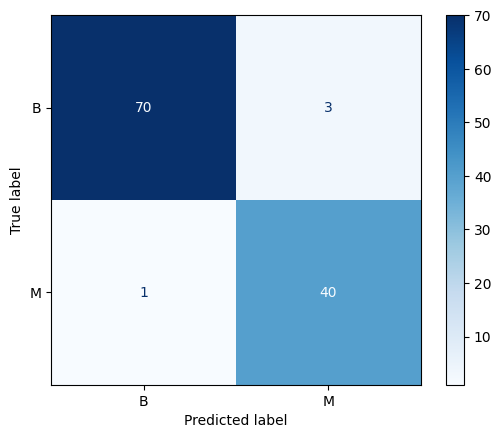

In [44]:
# ploting the complex matrix in graphical method

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vc.classes_)

disp.plot(cmap='Blues')
plt.show()

### Exporting mode in pickle form

In [45]:
import pickle

In [50]:
pickle.dump(vc, open('model.pkl', 'wb'))